In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -O summary.txt https://cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud/summary.txt

--2020-10-07 22:40:53--  https://cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud/summary.txt
Resolving cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud (cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud)... 169.63.118.98
Connecting to cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud (cp-protect-project.s3.us-east.cloud-object-storage.appdomain.cloud)|169.63.118.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4569083 (4.4M) [application/octet-stream]
Saving to: ‘summary.txt’

100%[======================================>] 4,569,083    507KB/s   in 8.2s   

2020-10-07 22:41:02 (546 KB/s) - ‘summary.txt’ saved [4569083/4569083]



In [3]:
df = pd.read_csv('summary.txt', skiprows=9, header=None)

In [8]:
df.columns = ["START_TIME:", "END_TIME:", "ACTIVITY:", "NUMBER:", "ENTITY:", "COMMMETH:", "ADDRESS:", "SCHEDULE_NAME:", "EXAMINED:", "AFFECTED:", "FAILED:", "BYTES:", "IDLE:", "MEDIAW:", "PROCESSES:", "SUCCESSFUL:", "VOLUME_NAME:", "DRIVE_NAME:", "LIBRARY_NAME:", "LAST_USE:", "COMM_WAIT:", "NUM_OFFSITE_VOLS:"]

In [9]:
df.head()

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:
0,2016-11-13 06:27:13.000000,2016-11-13 06:27:13.000000,POOLPRIMUTILGB,1,TEST_BACKUP,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN
1,2016-11-13 07:00:32.000000,2016-11-13 07:59:50.000000,TAPE MOUNT,0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,YES,C00890L5,DRIVE10 (/dev/TDRIVE-R10),3584LIB,Data,0.0,NaN
2,2016-11-13 07:00:07.000000,2016-11-13 07:55:58.000000,STGPOOL BACKUP,4616,VE_BKPOOL -> COPYPOOL_LTO5,NaN,NaN,MAINTENANCE,23938,23938,...,0,28,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
3,2016-11-13 08:35:14.000000,2016-11-13 08:35:14.000000,POOLPRIMUTILGB,1,TEST_ARCHIVE,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN
4,2016-11-13 07:31:13.000000,2016-11-13 07:31:13.000000,POOLPRIMUTILGB,1,NHS_ARCHIVE_PRIMARY,NaN,NaN,NaN,0,0,...,0,0,0,YES,NaN,NaN,NaN,NaN,0.0,NaN


In [6]:
df.shape

(35910, 22)

In [29]:
df['START_TIME:', 'END_TIME'] = pd.to_datetime(df['START_TIME:']).dt.normalize()

In [30]:
df.head

<bound method NDFrame.head of       START_TIME:  END_TIME:       ACTIVITY:  NUMBER:  \
0      2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
1      2016-11-13 2016-11-13      TAPE MOUNT        0   
2      2016-11-13 2016-11-13  STGPOOL BACKUP     4616   
3      2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
4      2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
5      2016-11-13 2016-11-13     PROCESS_END     4616   
6      2016-11-13 2016-11-13  POOLCOPYUTILGB        1   
7      2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
8      2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
9      2016-11-13 2016-11-13  POOLCOPYUTILGB        1   
10     2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
11     2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
12     2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
13     2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
14     2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
15     2016-11-13 2016-11-13  POOLPRIMUTILGB        1   
1

In [16]:
df[df['ACTIVITY:'].str.match('BACKUP')]

,START_TIME:,END_TIME:,ACTIVITY:,NUMBER:,ENTITY:,COMMMETH:,ADDRESS:,SCHEDULE_NAME:,EXAMINED:,AFFECTED:,...,IDLE:,MEDIAW:,PROCESSES:,SUCCESSFUL:,VOLUME_NAME:,DRIVE_NAME:,LIBRARY_NAME:,LAST_USE:,COMM_WAIT:,NUM_OFFSITE_VOLS:
92,2016-11-13,2016-11-13,BACKUP,3621827,SQLCLUS03 (SCS-SQL33_SQL),Tcp/Ip,172.25.2.54:64688,SQLLOGS_HOURLY,0,3,...,1,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
114,2016-11-13,2016-11-13,BACKUP,3621894,DC-SQL34_SQL,Tcp/Ip,172.31.2.97:56376,SQLLOGS_HOURLY,0,3,...,1,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
117,2016-11-13,2016-11-13,BACKUP,3621835,SQLCLUS03 (DC-SQL34_SQL),Tcp/Ip,172.31.2.97:56352,SQLLOGS_HOURLY,0,99,...,219,0,1,YES,NaN,NaN,NaN,NaN,7.0,NaN
120,2016-11-13,2016-11-13,BACKUP,3624388,SCS-SQL34_SQL,Tcp/Ip,172.25.2.55:63399,SQLLOGS_HOURLY,0,6,...,6,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
144,2016-11-13,2016-11-13,BACKUP,3621845,SCS-SQL34_SQL,Tcp/Ip,172.25.2.55:63074,SQLLOGS_HOURLY,0,6,...,7,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
155,2016-11-13,2016-11-13,BACKUP,3621828,SCS-SQL33_SQL,Tcp/Ip,172.25.2.54:64689,SQLLOGS_HOURLY,0,3,...,3,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
159,2016-11-13,2016-11-13,BACKUP,3619613,DC-SQL34_SQL,Tcp/Ip,172.31.2.97:52369,SQLLOGS_HOURLY,0,3,...,1,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN
161,2016-11-13,2016-11-13,BACKUP,3619549,SQLCLUS03 (DC-SQL34_SQL),Tcp/Ip,172.31.2.97:52358,SQLLOGS_HOURLY,0,99,...,214,0,1,YES,NaN,NaN,NaN,NaN,22.0,NaN
163,2016-11-12,2016-11-13,BACKUP,3616803,DC-SQL10_SQL (DC-SQL10),Tcp/Ip,172.31.1.95:52575,NaN,0,119,...,13,0,2,YES,NaN,NaN,NaN,NaN,3137.0,NaN
164,2016-12-03,2016-12-03,BACKUP,4902997,SCS-SQL34_SQL,Tcp/Ip,172.25.2.55:65158,SQLLOGS_HOURLY,0,6,...,8,0,1,YES,NaN,NaN,NaN,NaN,0.0,NaN


In [20]:
df[df['ACTIVITY:'].str.match('BACKUP')].groupby('START_TIME:').sum()

,NUMBER:,EXAMINED:,AFFECTED:,FAILED:,BYTES:,IDLE:,MEDIAW:,PROCESSES:,COMM_WAIT:,NUM_OFFSITE_VOLS:
START_TIME:,,,,,,,,,,
2016-11-06,883823531,11514281,148193,1,1765849624583,96215,1768,366,22934.0,0.0
2016-11-07,877622596,14766747,184971,7,1956957436159,103803,1293,444,30264.0,0.0
2016-11-08,933953143,14780073,217950,4,2186183757981,102577,1526,475,36669.0,0.0
2016-11-09,916952346,20106485,189803,3,1931205094112,102231,1614,485,30149.0,0.0
2016-11-10,924892730,20097703,231797,3,1889453833598,101774,1338,471,29801.0,0.0
2016-11-11,1512884531,20263273,330708,3,2319285138379,113758,1376,593,48012.0,0.0
2016-11-12,921502936,11577790,151504,3,1720366362319,99446,2194,446,22433.0,0.0
2016-11-13,922994403,14059516,161012,3,1752806611683,98653,1493,478,24446.0,0.0
2016-11-14,944676301,15332736,187930,3,1980952799805,126337,1444,482,30922.0,0.0


In [25]:
backupdaily = df[df['ACTIVITY:'].str.match('BACKUP')].groupby('START_TIME:').sum()

In [50]:
backupdaily['BYTES:']/(1e+12)

START_TIME:
2016-11-06    1.765850
2016-11-07    1.956957
2016-11-08    2.186184
2016-11-09    1.931205
2016-11-10    1.889454
2016-11-11    2.319285
2016-11-12    1.720366
2016-11-13    1.752807
2016-11-14    1.980953
2016-11-15    1.947673
2016-11-16    2.332555
2016-11-17    1.890884
2016-11-18    2.136103
2016-11-19    1.774389
2016-11-20    1.794375
2016-11-21    1.915587
2016-11-22    2.152853
2016-11-23    1.963544
2016-11-24    1.968894
2016-11-25    2.071913
2016-11-26    1.862412
2016-11-27    1.787671
2016-11-28    1.989061
2016-11-29    1.976046
2016-11-30    2.005547
2016-12-01    2.001853
2016-12-02    2.113658
2016-12-03    1.824735
2016-12-04    1.830635
2016-12-05    3.400948
2016-12-06    0.085831
Name: BYTES:, dtype: float64

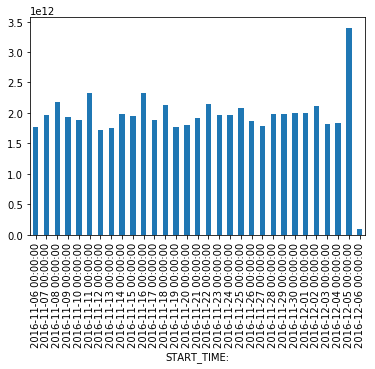

In [51]:
backupdaily['BYTES:'].plot(kind='bar') 